In [45]:
import pandas as pd
import numpy as np
import os

In [2]:
os.listdir('prep/data')

['new_ratings_with_real.csv',
 'population.csv',
 'weather.csv',
 'new_performance.csv',
 'new_rating.xlsx',
 'new_performance_ver3.csv',
 'new_performance_ver2.csv',
 'new_performance_ver4.csv',
 '미세먼지',
 '지역별가중합날씨.csv',
 '월별인구가중합날씨.csv',
 '시청률.xlsx',
 'weather2020.csv']

In [3]:
def drop_unnamed(data):
    names = data.columns
    for name in names:
        if "Unnamed" in name:
            data.pop(name)
    return data

In [4]:
pf = pd.read_csv("prep/data/new_performance_ver4.csv")
pf = drop_unnamed(pf)
pf.head(2)

방송일시  노출(분)    마더코드    상품코드            상품명 상품군   판매단가  \
0  2019-01-01 06:00:00   20.0  100346  201072  테이트 남성 셀린니트3종  의류  39900   
1  2019-01-01 06:00:00   20.0  100346  201079  테이트 여성 셀린니트3종  의류  39900   

         취급액        date  week      time  요일  설명  지속휴일수  IsHoliday  
0  2099000.0  2019-01-01     1  06:00:00   1  새해    1.0        1.0  
1  4371000.0  2019-01-01     1  06:00:00   1  새해    1.0        1.0

In [5]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   방송일시       35379 non-null  object 
 1   노출(분)      35379 non-null  float64
 2   마더코드       35379 non-null  int64  
 3   상품코드       35379 non-null  int64  
 4   상품명        35379 non-null  object 
 5   상품군        35379 non-null  object 
 6   판매단가       35379 non-null  int64  
 7   취급액        35379 non-null  float64
 8   date       35379 non-null  object 
 9   week       35379 non-null  int64  
 10  time       35379 non-null  object 
 11  요일         35379 non-null  int64  
 12  설명         35379 non-null  object 
 13  지속휴일수      35379 non-null  float64
 14  IsHoliday  35379 non-null  float64
dtypes: float64(4), int64(5), object(6)
memory usage: 4.0+ MB


In [35]:
pf['hour'] = pf['time'].apply(lambda x: datetime.strptime(x,
                                                         "%H:%M:%S").strftime("%-H"))
pf.head()

방송일시  노출(분)    마더코드    상품코드            상품명 상품군   판매단가  \
0  2019-01-01 06:00:00   20.0  100346  201072  테이트 남성 셀린니트3종  의류  39900   
1  2019-01-01 06:00:00   20.0  100346  201079  테이트 여성 셀린니트3종  의류  39900   
2  2019-01-01 06:20:00   20.0  100346  201072  테이트 남성 셀린니트3종  의류  39900   
3  2019-01-01 06:20:00   20.0  100346  201079  테이트 여성 셀린니트3종  의류  39900   
4  2019-01-01 06:40:00   20.0  100346  201072  테이트 남성 셀린니트3종  의류  39900   

         취급액        date  week      time  요일  설명  지속휴일수  IsHoliday hour  
0  2099000.0  2019-01-01     1  06:00:00   1  새해    1.0        1.0    6  
1  4371000.0  2019-01-01     1  06:00:00   1  새해    1.0        1.0    6  
2  3262000.0  2019-01-01     1  06:20:00   1  새해    1.0        1.0    6  
3  6955000.0  2019-01-01     1  06:20:00   1  새해    1.0        1.0    6  
4  6672000.0  2019-01-01     1  06:40:00   1  새해    1.0        1.0    6

In [6]:
weather = pd.read_csv("prep/data/월별인구가중합날씨.csv")
weather = drop_unnamed(weather)
weather.head()

time      TEMP        HUM
0  2019-01-01 01:00 -5.157666  53.621521
1  2019-01-01 02:00 -5.577352  56.876710
2  2019-01-01 03:00 -5.922292  58.845987
3  2019-01-01 04:00 -6.223195  60.195692
4  2019-01-01 05:00 -6.449101  61.929722

In [7]:
from datetime import datetime

In [8]:
weather['date'] = weather['time'].apply(lambda x: datetime.strptime(x,
                                                                   '%Y-%m-%d %H:%M').strftime("%Y-%m-%d"))
weather['hour'] = weather['time'].apply(lambda x: datetime.strptime(x,
                                                                   '%Y-%m-%d %H:%M').strftime("%-H"))
weather['time'] = weather['time'].apply(lambda x: datetime.strptime(x,
                                                                   '%Y-%m-%d %H:%M').strftime("%H:%M:%S"))


weather.head()

time      TEMP        HUM        date hour
0  01:00:00 -5.157666  53.621521  2019-01-01    1
1  02:00:00 -5.577352  56.876710  2019-01-01    2
2  03:00:00 -5.922292  58.845987  2019-01-01    3
3  04:00:00 -6.223195  60.195692  2019-01-01    4
4  05:00:00 -6.449101  61.929722  2019-01-01    5

In [30]:
dust = pd.read_csv("prep/인구가중힙미세먼지.csv")
del dust['month']
dust['hour'] = dust['hour'].astype('U')
dust.head()

date hour       SO2        CO        O3       NO2      PM10      PM25
0  2019-01-01    0  0.000660  0.143216  0.173666  0.004912  8.015098  5.087954
1  2019-01-01    1  0.000566  0.137347  0.171010  0.004942  7.567525  5.482640
2  2019-01-01    2  0.000579  0.145409  0.185895  0.004968  7.297391  4.900831
3  2019-01-01    3  0.000579  0.139966  0.194004  0.004832  6.809900  4.898821
4  2019-01-01    4  0.000592  0.129127  0.204225  0.004748  6.375644  4.761557

In [66]:
dust['time'] = dust['date'] + ' ' + dust['hour']
dust['time'] = dust['time'].apply(lambda x: datetime.strptime(x,
                                                             "%Y-%m-%d %H")
                                 )
dust.head()

date hour       SO2        CO        O3       NO2      PM10  \
0  2019-01-01    0  0.000660  0.143216  0.173666  0.004912  8.015098   
1  2019-01-01    1  0.000566  0.137347  0.171010  0.004942  7.567525   
2  2019-01-01    2  0.000579  0.145409  0.185895  0.004968  7.297391   
3  2019-01-01    3  0.000579  0.139966  0.194004  0.004832  6.809900   
4  2019-01-01    4  0.000592  0.129127  0.204225  0.004748  6.375644   

       PM25                time  
0  5.087954 2019-01-01 00:00:00  
1  5.482640 2019-01-01 01:00:00  
2  4.900831 2019-01-01 02:00:00  
3  4.898821 2019-01-01 03:00:00  
4  4.761557 2019-01-01 04:00:00

In [70]:
import plotly.express as px
df = dust[['time', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']]
fig = px.line(df, x = 'time', y = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25'],
             width = 1000)
fig.update_layout(title = "미세먼지 데이터 추이(2019.01 ~ 2020.05)",
                 )

fig.show()

In [31]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12408 entries, 0 to 12407
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    12408 non-null  object 
 1   hour    12408 non-null  object 
 2   SO2     12408 non-null  float64
 3   CO      12408 non-null  float64
 4   O3      12408 non-null  float64
 5   NO2     12408 non-null  float64
 6   PM10    12408 non-null  float64
 7   PM25    12408 non-null  float64
dtypes: float64(6), object(2)
memory usage: 775.6+ KB


In [13]:
# view = pd.read_excel("prep/data/시청률.xlsx")
# view.columns = view.iloc[0]
# view = view[1:].reset_index(drop = True)
# view = view[241:-1]
# view["시간대"] = view["시간대"].apply(lambda x: datetime.strptime(x, "%H:%M").time())

# view.head()

view = pd.read_excel("prep/data/new_rating.xlsx")
view = drop_unnamed(view)
view.head()

date      time  rating  month  day  week  hour  minute
0 2019-01-01  06:01:00     0.0      1    1     1     6       1
1 2019-01-01  06:02:00     0.0      1    1     1     6       2
2 2019-01-01  06:03:00     0.0      1    1     1     6       3
3 2019-01-01  06:04:00     0.0      1    1     1     6       4
4 2019-01-01  06:05:00     0.0      1    1     1     6       5

In [14]:
view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437635 entries, 0 to 437634
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    437635 non-null  datetime64[ns]
 1   time    437635 non-null  object        
 2   rating  437635 non-null  float64       
 3   month   437635 non-null  int64         
 4   day     437635 non-null  int64         
 5   week    437635 non-null  int64         
 6   hour    437635 non-null  int64         
 7   minute  437635 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 26.7+ MB


In [15]:
view['date'] = view['date'].astype('U')
view['hour'] = view['hour'].astype('U')

In [16]:
view.head()

date      time  rating  month  day  week hour  minute
0  2019-01-01  06:01:00     0.0      1    1     1    6       1
1  2019-01-01  06:02:00     0.0      1    1     1    6       2
2  2019-01-01  06:03:00     0.0      1    1     1    6       3
3  2019-01-01  06:04:00     0.0      1    1     1    6       4
4  2019-01-01  06:05:00     0.0      1    1     1    6       5

## 시청률과 날씨/미세먼지 의 관계성

weather, view, dust

In [20]:
import plotly.express as px
import seaborn as sns

In [17]:
data = pd.merge(weather[['TEMP', 'HUM', 'date', 'hour']], view, on = ['date', 'hour'])

In [18]:
data.head()

TEMP        HUM        date hour      time  rating  month  day  week  \
0 -5.157666  53.621521  2019-01-01    1  01:00:00   0.000      1    1     1   
1 -5.157666  53.621521  2019-01-01    1  01:01:00   0.000      1    1     1   
2 -5.157666  53.621521  2019-01-01    1  01:02:00   0.034      1    1     1   
3 -5.157666  53.621521  2019-01-01    1  01:03:00   0.000      1    1     1   
4 -5.157666  53.621521  2019-01-01    1  01:04:00   0.000      1    1     1   

   minute  
0       0  
1       1  
2       2  
3       3  
4       4

<AxesSubplot:>

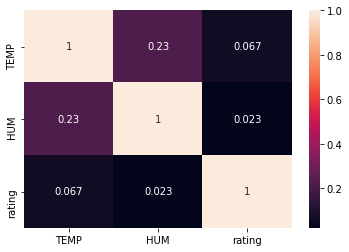

In [21]:
sns.heatmap(data[['TEMP', 'HUM', 'rating']].corr(), annot=True)

In [27]:
data['sub'] = abs(20 - data['TEMP'])
display(data.head())
data.describe()

TEMP        HUM        date hour      time  rating  month  day  week  \
0 -5.157666  53.621521  2019-01-01    1  01:00:00   0.000      1    1     1   
1 -5.157666  53.621521  2019-01-01    1  01:01:00   0.000      1    1     1   
2 -5.157666  53.621521  2019-01-01    1  01:02:00   0.034      1    1     1   
3 -5.157666  53.621521  2019-01-01    1  01:03:00   0.000      1    1     1   
4 -5.157666  53.621521  2019-01-01    1  01:04:00   0.000      1    1     1   

   minute        sub  
0       0  25.157666  
1       1  25.157666  
2       2  25.157666  
3       3  25.157666  
4       4  25.157666

TEMP            HUM         rating          month  \
count  436436.000000  436436.000000  436436.000000  436436.000000   
mean       13.900012      62.209049       0.004727       6.512501   
std         9.748663      18.435407       0.011812       3.440608   
min        -8.577640      16.928262       0.000000       1.000000   
25%         5.424781      48.560156       0.000000       4.000000   
50%        14.686777      63.332886       0.000000       7.000000   
75%        22.394588      77.208940       0.000000      10.000000   
max        33.703554      96.144207       0.812000      12.000000   

                 day           week         minute            sub  
count  436436.000000  436436.000000  436436.000000  436436.000000  
mean       15.682696       3.000000      29.524604       9.285904  
std         8.771898       2.000002      17.304366       6.783669  
min         1.000000       0.000000       0.000000       0.002831  
25%         8.000000       1.000000      15.000000       3.633847  
50%        16.000000       3.000000      30.000000       7.487515  
75%        23.000000       5.000000      45.000000      14.575219  
max        31.000000       6.000000      59.000000      28.577640

<AxesSubplot:>

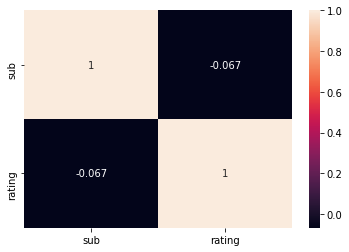

In [26]:
sns.heatmap(data[['sub', 'rating']].corr(), annot=True)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data1 = pd.merge(dust, view, on = ['date', 'hour'])
data1.head()

date hour      SO2        CO        O3       NO2      PM10      PM25  \
0  2019-01-01    0  0.00066  0.143216  0.173666  0.004912  8.015098  5.087954   
1  2019-01-01    0  0.00066  0.143216  0.173666  0.004912  8.015098  5.087954   
2  2019-01-01    0  0.00066  0.143216  0.173666  0.004912  8.015098  5.087954   
3  2019-01-01    0  0.00066  0.143216  0.173666  0.004912  8.015098  5.087954   
4  2019-01-01    0  0.00066  0.143216  0.173666  0.004912  8.015098  5.087954   

       time  rating  month  day  week  minute  
0  00:00:00     0.0      1    1     1       0  
1  00:01:00     0.0      1    1     1       1  
2  00:02:00     0.0      1    1     1       2  
3  00:03:00     0.0      1    1     1       3  
4  00:04:00     0.0      1    1     1       4

<AxesSubplot:>

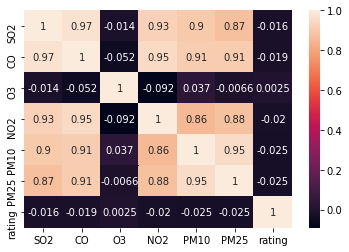

In [33]:
sns.heatmap(data1[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'rating']].corr(), annot=True)

절망적...

## 실적과 날씨/미세먼지의 관계성

In [37]:
data2 = pd.merge(weather[['TEMP', 'HUM', 'date', 'hour']], pf, on = ['date', 'hour'])
data2.head(2)

TEMP        HUM        date hour                 방송일시  노출(분)    마더코드  \
0 -5.157666  53.621521  2019-01-01    1  2019-01-02 01:00:00   20.0  100193   
1 -5.157666  53.621521  2019-01-01    1  2019-01-02 01:20:00   20.0  100193   

     상품코드                 상품명 상품군   판매단가         취급액  week      time  요일  설명  \
0  200652  레이프릴 무빙 맥시풀커버 브라팬티  속옷  69900   9647000.0     1  01:00:00   1  새해   
1  200652  레이프릴 무빙 맥시풀커버 브라팬티  속옷  69900  15516000.0     1  01:20:00   1  새해   

   지속휴일수  IsHoliday  
0    1.0        1.0  
1    1.0        1.0

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 52712 missing from current font.

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 44553 missing from current font.

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 50529 missing from current font.

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 52712 missing from current font.

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 44553 missing from current font.

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 50529 missing from current font.



<AxesSubplot:>

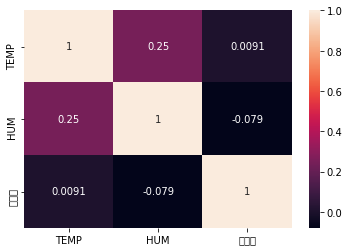

In [40]:
sns.heatmap(data2[['TEMP', 'HUM', '취급액']].corr(), annot=True)

In [42]:
data3 = pd.merge(dust, pf, on = ['date', 'hour'])
data3.head()

date hour      SO2        CO        O3       NO2      PM10      PM25  \
0  2019-01-01    0  0.00066  0.143216  0.173666  0.004912  8.015098  5.087954   
1  2019-01-01    0  0.00066  0.143216  0.173666  0.004912  8.015098  5.087954   
2  2019-01-01    0  0.00066  0.143216  0.173666  0.004912  8.015098  5.087954   
3  2019-01-01    0  0.00066  0.143216  0.173666  0.004912  8.015098  5.087954   
4  2019-01-01    0  0.00066  0.143216  0.173666  0.004912  8.015098  5.087954   

                  방송일시  노출(분)  ...                  상품명  상품군   판매단가  \
0  2019-01-02 00:00:00   20.0  ...  그렉노먼 남성 캐시터치 터틀넥 4종   의류  69900   
1  2019-01-02 00:00:00   20.0  ...  그렉노먼 여성 캐시터치 터틀넥 4종   의류  69900   
2  2019-01-02 00:20:00   20.0  ...  그렉노먼 남성 캐시터치 터틀넥 4종   의류  69900   
3  2019-01-02 00:20:00   20.0  ...  그렉노먼 여성 캐시터치 터틀넥 4종   의류  69900   
4  2019-01-02 00:40:00   20.0  ...  그렉노먼 남성 캐시터치 터틀넥 4종   의류  69900   

          취급액  week      time  요일  설명  지속휴일수 IsHoliday  
0   6082000.0     1  00:00:00   1  새해    1.0       1.0  
1   6445000.0     1  00:00:00   1  새해    1.0       1.0  
2  11985000.0     1  00:20:00   1  새해    1.0       1.0  
3   8491000.0     1  00:20:00   1  새해    1.0       1.0  
4  16461000.0     1  00:40:00   1  새해    1.0       1.0  

[5 rows x 22 columns]

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 52712 missing from current font.

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 44553 missing from current font.

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 50529 missing from current font.

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 52712 missing from current font.

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 44553 missing from current font.

/home/yeeunlee/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 50529 missing from current font.



<AxesSubplot:>

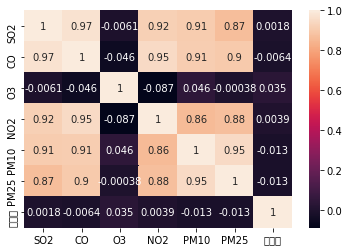

In [44]:
sns.heatmap(data3[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '취급액']].corr(), annot=True)